In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_excel('lap_data.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Manufacturer  1252 non-null   object
 1   Model_Name    1252 non-null   object
 2   Category      1252 non-null   object
 3   Screen_Size   1252 non-null   object
 4   Screen        1252 non-null   object
 5   CPU           1252 non-null   object
 6   RAM           1252 non-null   object
 7   Storage       1252 non-null   object
 8   GPU           1252 non-null   object
 9   OS            1252 non-null   object
 10  OS_Version    1088 non-null   object
 11  Weight        1252 non-null   object
 12  product_id    1252 non-null   int64 
dtypes: int64(1), object(12)
memory usage: 127.3+ KB


In [18]:
ds = dataset[['Manufacturer', 'Model_Name', 'Category', 'Screen_Size', 'Screen', 'CPU', 'RAM', 'Storage', 'GPU', 'OS', 'OS_Version', 'Weight']]
ds.drop_duplicates(inplace=True)
ds

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight
0,HP,15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Ultrabook,"15.6""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.91kg
1,HP,15-BS103nv (i5-8250U/6GB/256GB/Radeon,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,6GB,256GB SSD,AMD Radeon 520,Windows,10,1.91kg
2,HP,15-BW004nv (A9-9420/4GB/256GB/Radeon,Ultrabook,"15.6""",Full HD 1920x1080,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon 520,Windows,10,1.91kg
3,HP,15-bs017nv (i7-7500U/8GB/256GB/Radeon,Notebook,"15.6""",Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon 530,Windows,10,1.91kg
4,HP,15-bw002nv (A6-9220/4GB/256GB/Radeon,Notebook,"15.6""",Full HD 1920x1080,AMD A6-Series A6-9220 2.5GHz,4GB,256GB SSD,AMD Radeon 520,Windows,10,1.91kg
...,...,...,...,...,...,...,...,...,...,...,...,...
1247,Asus,X541NA-GO121 (N4200/4GB/1TB/Linux),Notebook,"15.6""",1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Linux,NaN,2kg
1248,Asus,X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux),Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,Intel HD Graphics 520,Linux,NaN,2kg
1249,Asus,X542UQ-DM117 (i3-7100U/8GB/1TB/GeForce,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Linux,NaN,2.3kg
1250,Asus,X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce,Notebook,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Linux,NaN,2.3kg


In [19]:
def rmkg(char = str):
    char = float(char.replace('k', '').replace('g', '').replace('s', ''))
    return char
ds['Weight'] = ds['Weight'].apply(rmkg)

In [20]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
le = LabelEncoder()
encoders = {}
for col in ds.columns:
    encoder = LabelEncoder() 
#     print(ds.columns[-1])
    if col == ds.columns[-1] or col == 'Birch_cls':
        print(ds.columns[-1])
        pass
    else:
        ds[col] = encoder.fit_transform(ds[col])
    encoders[col] = encoder
ds

Weight


,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight
0,7,8,4,14,8,104,8,15,52,5,0,1.91
1,7,9,3,14,8,81,7,15,5,5,0,1.91
2,7,10,4,14,8,14,5,15,5,5,0,1.91
3,7,21,3,14,8,95,8,15,6,5,0,1.91
4,7,30,3,14,8,10,5,15,5,5,0,1.91
...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2,522,3,14,0,111,5,8,43,2,4,2.00
1248,2,525,3,14,8,54,5,15,46,2,4,2.00
1249,2,527,3,14,8,57,8,8,68,2,4,2.30
1250,2,528,3,14,0,72,8,8,68,2,4,2.30


<Axes: xlabel='Model_Name', ylabel='Manufacturer'>

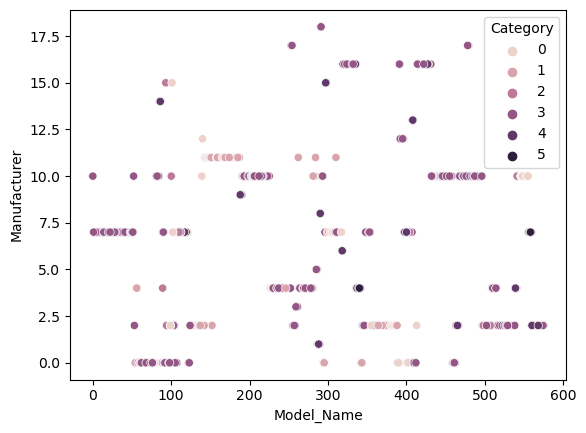

In [6]:
sns.scatterplot(ds, x='Model_Name', y='Manufacturer', hue='Category')

In [21]:
ctg = ds['Category']
ds.drop(['Model_Name', 'Category'], axis=1, inplace=True)
ds.drop_duplicates(inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1251
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1225 non-null   int32  
 1   Screen_Size   1225 non-null   int32  
 2   Screen        1225 non-null   int32  
 3   CPU           1225 non-null   int32  
 4   RAM           1225 non-null   int32  
 5   Storage       1225 non-null   int32  
 6   GPU           1225 non-null   int32  
 7   OS            1225 non-null   int32  
 8   OS_Version    1225 non-null   int32  
 9   Weight        1225 non-null   float64
dtypes: float64(1), int32(9)
memory usage: 62.2 KB


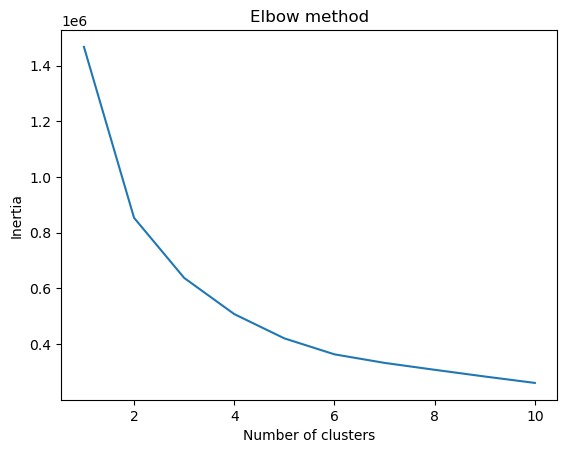

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
val = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(ds)
    val.append(km.inertia_)
    
plt.plot(range(1, 11), val)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<Axes: xlabel='GPU'>

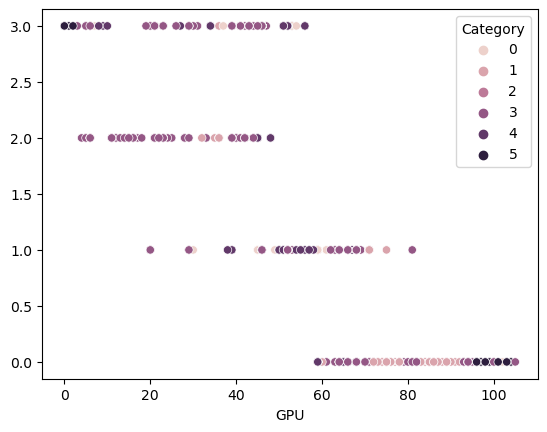

In [18]:
km = KMeans(n_clusters=4)
nw = km.fit_predict(ds, sample_weight=True)
sns.scatterplot(ds, y=nw, x=ds['GPU'], hue=ctg)

<Axes: xlabel='Birch_cls', ylabel='CPU'>

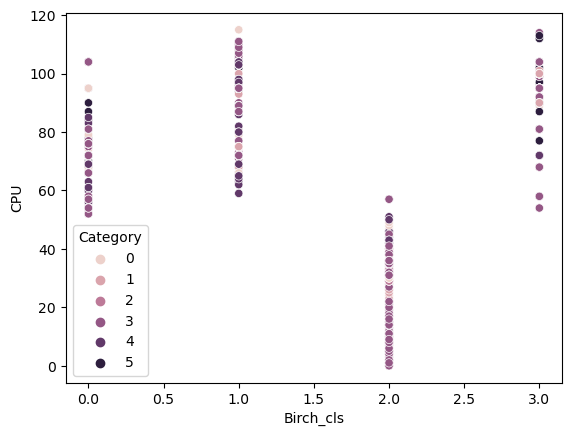

In [22]:
from sklearn.cluster import Birch

km = Birch(n_clusters=4)
ds['Birch_cls'] = km.fit_predict(ds)
sns.scatterplot(ds, x='Birch_cls', y='CPU', hue=ctg)

In [23]:
ds

,Manufacturer,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Birch_cls
0,7,14,8,104,8,15,52,5,0,1.91,1
1,7,14,8,81,7,15,5,5,0,1.91,0
2,7,14,8,14,5,15,5,5,0,1.91,2
3,7,14,8,95,8,15,6,5,0,1.91,0
4,7,14,8,10,5,15,5,5,0,1.91,2
...,...,...,...,...,...,...,...,...,...,...,...
1247,2,14,0,111,5,8,43,2,4,2.00,1
1248,2,14,8,54,5,15,46,2,4,2.00,0
1249,2,14,8,57,8,8,68,2,4,2.30,0
1250,2,14,0,72,8,8,68,2,4,2.30,1


In [24]:
# classer = ds['Birch_cls']
# ds.drop('Birch_cls', axis=1, inplace=True)
for col in ds.columns:
    if col == "Weight" or col == "Birch_cls":
        pass
    else:
        ds[col] = encoders[col].inverse_transform(ds[col])

# ds['Birch_cls'] = classer
ds.to_csv('clusetred.csv')
ds

,Manufacturer,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Birch_cls
0,HP,"15.6""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.91,1
1,HP,"15.6""",Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,6GB,256GB SSD,AMD Radeon 520,Windows,10,1.91,0
2,HP,"15.6""",Full HD 1920x1080,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon 520,Windows,10,1.91,2
3,HP,"15.6""",Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon 530,Windows,10,1.91,0
4,HP,"15.6""",Full HD 1920x1080,AMD A6-Series A6-9220 2.5GHz,4GB,256GB SSD,AMD Radeon 520,Windows,10,1.91,2
...,...,...,...,...,...,...,...,...,...,...,...
1247,Asus,"15.6""",1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Linux,NaN,2.00,1
1248,Asus,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,Intel HD Graphics 520,Linux,NaN,2.00,0
1249,Asus,"15.6""",Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Linux,NaN,2.30,0
1250,Asus,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Linux,NaN,2.30,1


In [25]:
ds.to_csv('clusetred.csv')